In [ ]:
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model, Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
import numpy as np
import time 
from sklearn.preprocessing import OneHotEncoder
#import keras_metrics
import keras_metrics
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

https://pypi.org/project/keras-metrics/
https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras
https://keras.io/api/layers/core_layers/activation/

In [ ]:
!pip install keras-metrics

In [ ]:
sepsis = pd.read_csv('/content/drive/My Drive/Insight 2020/Sepsis Detection/24hr_windows_sep_only.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
sepsis.head()

,index,PatientID_Part,Hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_At_All
0,2880,p000009 0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,27,1,0.0,0.0,0.03,1,0,1
1,2881,p000009 0,1,117.0,99.0,0.0,116.0,97.0,81.0,20.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,27,1,0.0,0.0,0.03,2,0,1
2,2882,p000009 0,2,117.6,99.2,0.0,116.4,94.4,77.6,22.0,0.0,-7.0,23.0,0.0,7.15,66.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,3.6,0.0,0.0,4.0,0.0,0.0,37.6,12.70,46.4,8.900000,124.000000,64.000000,27,1,0.0,0.0,0.03,3,0,1
3,2883,p000009 0,3,118.2,99.4,0.0,116.8,91.8,74.2,24.0,0.0,-4.0,23.5,0.0,7.13,80.5,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.5,2.7,0.0,0.0,3.6,0.0,0.0,31.0,9.65,40.8,3.900000,180.000000,114.000000,27,1,0.0,0.0,0.03,4,0,1
4,2884,p000009 0,4,118.8,99.6,0.0,117.2,89.2,70.8,26.0,0.0,-1.0,24.0,0.0,7.30,52.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,3.8,0.0,0.0,3.6,0.0,0.0,28.0,9.30,39.8,4.033333,190.666667,115.333333,27,1,0.0,0.0,0.03,5,0,1


In [ ]:
len(sepsis['PatientID_Part'].unique())

113811

In [ ]:
test = sepsis[sepsis['PatientID_Part'] == 'p000009 0']
labels = sepsis['SepsisLabel'].values
len(labels)
test.tail()


,index,PatientID_Part,Hours,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Sepsis_At_All
19,2899,p000009 0,19,98.0,93.0,37.00,115.5,73.5,60.0,20.75,0.0,-2.000000,23.0,1.000,7.280,52.0,75.24,0.0,13.000000,0.0,7.715,108.0,1.200000,0.0,130.0,3.2,2.0,4.600000,4.50,0.0,0.0,39.100000,14.6,31.000000,12.100000,285.625,137.000000,27,1,0.0,0.0,0.03,20,0,1
20,2900,p000009 0,20,94.5,96.5,37.06,112.0,73.0,61.5,20.00,0.0,-2.333333,23.0,1.000,7.300,48.0,75.28,0.0,13.090909,0.0,7.750,108.0,1.209091,0.0,123.2,3.2,2.0,4.563636,4.38,0.0,0.0,38.936364,14.5,31.055556,12.327273,289.250,133.909091,27,1,0.0,0.0,0.03,21,0,1
21,2901,p000009 0,21,91.5,97.0,36.94,113.0,73.0,61.0,18.00,0.0,-2.666667,23.0,1.000,7.320,44.0,75.32,0.0,13.181818,0.0,7.785,108.0,1.218182,0.0,116.4,3.2,2.0,4.527273,4.26,0.0,0.0,38.772727,14.4,31.111111,12.554545,292.875,130.818182,27,1,0.0,0.0,0.03,22,0,1
22,2902,p000009 0,22,91.0,97.0,37.00,109.0,71.0,59.0,18.00,0.0,-3.000000,23.0,1.000,7.340,40.0,75.36,0.0,13.272727,0.0,7.820,108.0,1.227273,0.0,109.6,3.2,2.0,4.490909,4.14,0.0,0.0,38.609091,14.3,31.166667,12.781818,296.500,127.727273,27,1,0.0,0.0,0.03,23,0,1
23,2903,p000009 0,23,90.0,99.0,37.06,103.0,74.0,62.0,18.00,0.0,-2.000000,23.0,0.975,7.355,40.0,75.40,0.0,13.363636,0.0,7.855,108.0,1.236364,0.0,102.8,2.8,2.0,4.454545,4.02,0.0,0.0,38.445455,14.2,31.222222,13.009091,300.125,124.636364,27,1,0.0,0.0,0.03,24,0,1


In [ ]:
enc = OneHotEncoder()
enc.fit(labels.reshape(-1,1))
enc.transform(test['SepsisLabel'].values.reshape(-1,1)).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
enc.get_feature_names()

array(['x0_0', 'x0_1'], dtype=object)

In [ ]:
X_s, y_s = np.zeros((113811,24,41)),np.zeros((113811,24,2))
i = 0
start_time = time.time()
for a,b in sepsis.groupby('PatientID_Part'):
    if i % 1000 == 0:
        current_time = time.time()
        print(i,' th pass ',current_time - start_time)
    #pull x and y
    x = b.iloc[:,2:-2].values
    y = b.iloc[:,-2].values
    X_s[i,:,:] = x
    y_s[i,:,:] = enc.transform(y.reshape(-1,1)).toarray()
    i += 1

0  th pass  0.6841673851013184
1000  th pass  1.5161302089691162
2000  th pass  2.354663610458374
3000  th pass  3.2014517784118652
4000  th pass  4.037677049636841
5000  th pass  4.874776840209961
6000  th pass  5.690533399581909
7000  th pass  6.5036232471466064
8000  th pass  7.322156667709351
9000  th pass  8.149502992630005
10000  th pass  8.967341661453247
11000  th pass  9.784305572509766
12000  th pass  10.64125108718872
13000  th pass  11.460203409194946
14000  th pass  12.27893614768982
15000  th pass  13.091765642166138
16000  th pass  13.925808191299438
17000  th pass  14.7455472946167
18000  th pass  15.56809139251709
19000  th pass  16.398465156555176
20000  th pass  17.225271224975586
21000  th pass  18.050193786621094
22000  th pass  18.86442518234253
23000  th pass  19.695619821548462
24000  th pass  20.533133268356323
25000  th pass  21.38907480239868
26000  th pass  22.23240900039673
27000  th pass  23.073524713516235
28000  th pass  23.920822620391846
29000  th pass

In [ ]:
enc.transform(y.reshape(-1,1)).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
print(X_s.shape)
print(y_s.shape)

(113811, 24, 41)
(113811, 24, 2)


In [ ]:
def softmax(x, axis=1):
    """Softmax activation function.
    # Arguments
        x : Tensor.
        axis: Integer, axis along which the softmax normalization is applied.
    # Returns
        Tensor, output of softmax transformation.
    # Raises
        ValueError: In case `dim(x) == 1`.
    """
    ndim = K.ndim(x)
    if ndim == 2:
        return K.softmax(x)
    elif ndim > 2:
        e = K.exp(x - K.max(x, axis=axis, keepdims=True))
        s = K.sum(e, axis=axis, keepdims=True)
        return e / s
    else:
        raise ValueError('Cannot apply softmax to a tensor that is 1D')

In [ ]:
# Defined shared layers as global variables
m = 113811
Tx = 24
repeator = RepeatVector(Tx)
concatenator = Concatenate(axis=-1)
densor1 = Dense(10, activation = "tanh")
densor2 = Dense(1, activation = "relu")
activator = Activation(softmax, name='attention_weights') # We are using a custom softmax(axis = 1) loaded in this notebook
dotor = Dot(axes = 1)

In [ ]:
def one_step_attention(a, s_prev):
    """
    Performs one step of attention: Outputs a context vector computed as a dot product of the attention weights
    "alphas" and the hidden states "a" of the Bi-LSTM.
    
    Arguments:
    a -- hidden state output of the Bi-LSTM, numpy-array of shape (m, Tx, 2*n_a)
    s_prev -- previous hidden state of the (post-attention) LSTM, numpy-array of shape (m, n_s)
    
    Returns:
    context -- context vector, input of the next (post-attetion) LSTM cell
    """
    
    ### START CODE HERE ###
    # Use repeator to repeat s_prev to be of shape (m, Tx, n_s) so that you can concatenate it with all hidden states "a" (≈ 1 line)
    s_prev = repeator(s_prev)
    # Use concatenator to concatenate a and s_prev on the last axis (≈ 1 line)
    concat = concatenator([a, s_prev])
    # Use densor1 to propagate concat through a small fully-connected neural network to compute the "intermediate energies" variable e. (≈1 lines)
    e = densor1(concat)
    # Use densor2 to propagate e through a small fully-connected neural network to compute the "energies" variable energies. (≈1 lines)
    energies = densor2(e)
    # Use "activator" on "energies" to compute the attention weights "alphas" (≈ 1 line)
    alphas = activator(energies)
    # Use dotor together with "alphas" and "a" to compute the context vector to be given to the next (post-attention) LSTM-cell (≈ 1 line)
    context = dotor([alphas, a])
    ### END CODE HERE ###
    
    return context

In [ ]:
n_a = 32
n_s = 64
post_activation_LSTM_cell = LSTM(n_s, return_state = True)
output_layer = Dense(2, activation=softmax)

In [ ]:
def model(Tx, Ty, n_a, n_s, human_vocab_size, machine_vocab_size):
    """
    Arguments:
    Tx -- length of the input sequence
    Ty -- length of the output sequence
    n_a -- hidden state size of the Bi-LSTM
    n_s -- hidden state size of the post-attention LSTM
    human_vocab_size -- size of the python dictionary "human_vocab"
    machine_vocab_size -- size of the python dictionary "machine_vocab"

    Returns:
    model -- Keras model instance
    """
    
    # Define the inputs of your model with a shape (Tx,)
    # Define s0 and c0, initial hidden state for the decoder LSTM of shape (n_s,)
    X = Input(shape=(Tx, human_vocab_size))
    s0 = Input(shape=(n_s,), name='s0')
    c0 = Input(shape=(n_s,), name='c0')
    s = s0
    c = c0
    
    # Initialize empty list of outputs
    outputs = []
    
    ### START CODE HERE ###
    
    # Step 1: Define your pre-attention Bi-LSTM. Remember to use return_sequences=True. (≈ 1 line)
    a = Bidirectional(LSTM(n_a, return_sequences = True))(X)    
    # Step 2: Iterate for Ty steps
    for t in range(Ty):
    
        # Step 2.A: Perform one step of the attention mechanism to get back the context vector at step t (≈ 1 line)
        context = one_step_attention(a, s)
        
        # Step 2.B: Apply the post-attention LSTM cell to the "context" vector.
        # Don't forget to pass: initial_state = [hidden state, cell state] (≈ 1 line)
        s, _, c = post_activation_LSTM_cell(context, initial_state = [s, c])
        
        # Step 2.C: Apply Dense layer to the hidden state output of the post-attention LSTM (≈ 1 line)
        out = output_layer(s)
        
        # Step 2.D: Append "out" to the "outputs" list (≈ 1 line)
        outputs.append(out)
    
    # Step 3: Create model instance taking three inputs and returning the list of outputs. (≈ 1 line)
    model = Model(inputs = [X, s0, c0], outputs = outputs)
    
    ### END CODE HERE ###
    
    return model

In [ ]:
model = model(24,24, n_a, n_s, 41, 2)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 24, 41)]     0                                            
__________________________________________________________________________________________________
s0 (InputLayer)                 [(None, 64)]         0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 24, 64)       18944       input_2[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 24, 64)       0           s0[0][0]                         
                                                                 lstm[24][0]           

In [ ]:
opt = Adam(lr = 0.005, beta_1 = 0.9, beta_2 = 0.999, decay = 0.01)
model.compile(optimizer = opt, loss = "categorical_crossentropy", 
              metrics = ['accuracy',keras_metrics.precision(),keras_metrics.recall(),keras_metrics.f1_score()])

In [ ]:
s0 = np.zeros((m, n_s))
c0 = np.zeros((m, n_s))
outputs = list(y_s.swapaxes(0,1))

In [ ]:
y_s.shape

(113811, 24, 2)

In [ ]:
#callbacks
folder = '/content/drive/My Drive/Insight 2020/Sepsis Detection/Version5_LSTM_Attention'
mcp_save_train_hidden_states = ModelCheckpoint(folder+'/LSTM_hiddenstates_v3.h5', 
                                               save_best_only=True, 
                                               monitor='val_dense_1_loss', 
                                               mode='min')
mcp_save_train_final_output = ModelCheckpoint(folder+'/LSTM_finaloutput_v3.h5', 
                                              save_best_only=True, 
                                              monitor='val_dense_2_loss', 
                                              mode='min')

history = model.fit([X_s, s0, c0], outputs, epochs=50, 
          batch_size=128,
          callbacks=[mcp_save_train_hidden_states,mcp_save_train_final_output],
          validation_split = 0.2)

pd.DataFrame(history.history).to_csv(folder+'/LSTM_Attention_v2.csv')

Epoch 1/50
712/712 [==============================] - 104s 146ms/step - loss: 2.3378 - dense_2_loss: 0.0084 - dense_2_1_loss: 0.0039 - dense_2_2_loss: 0.0031 - dense_2_3_loss: 0.0029 - dense_2_4_loss: 0.0028 - dense_2_5_loss: 0.0029 - dense_2_6_loss: 0.0030 - dense_2_7_loss: 0.0031 - dense_2_8_loss: 0.0033 - dense_2_9_loss: 0.0036 - dense_2_10_loss: 0.0041 - dense_2_11_loss: 0.0048 - dense_2_12_loss: 0.0059 - dense_2_13_loss: 0.0080 - dense_2_14_loss: 0.0120 - dense_2_15_loss: 0.0675 - dense_2_16_loss: 0.1292 - dense_2_17_loss: 0.1803 - dense_2_18_loss: 0.2248 - dense_2_19_loss: 0.2650 - dense_2_20_loss: 0.3010 - dense_2_21_loss: 0.3348 - dense_2_22_loss: 0.3668 - dense_2_23_loss: 0.3969 - dense_2_accuracy: 0.9999 - dense_2_precision: 0.9730 - dense_2_recall: 0.9988 - dense_2_f1_score: 0.9858 - dense_2_1_accuracy: 0.9999 - dense_2_1_precision: 0.9730 - dense_2_1_recall: 0.9988 - dense_2_1_f1_score: 0.9858 - dense_2_2_accuracy: 0.9999 - dense_2_2_precision: 0.9731 - dense_2_2_recall: 0.

KeyboardInterrupt: ignored

In [ ]:
model.history.history


{}

In [ ]:
pd.DataFrame(model.history.history).to_csv('/content/drive/My Drive/Insight 2020/Sepsis Detection/Version5_LSTM_Attention/metric_v1.csv')

In [ ]:
metrics = pd.read_csv('/content/drive/My Drive/Insight 2020/Sepsis Detection/Version5_LSTM_Attention/metric_v1.csv')
metrics.head()

,Unnamed: 0,loss,dense_2_loss,dense_2_1_loss,dense_2_2_loss,dense_2_3_loss,dense_2_4_loss,dense_2_5_loss,dense_2_6_loss,dense_2_7_loss,dense_2_8_loss,dense_2_9_loss,dense_2_10_loss,dense_2_11_loss,dense_2_12_loss,dense_2_13_loss,dense_2_14_loss,dense_2_15_loss,dense_2_16_loss,dense_2_17_loss,dense_2_18_loss,dense_2_19_loss,dense_2_20_loss,dense_2_21_loss,dense_2_22_loss,dense_2_23_loss,dense_2_accuracy,dense_2_precision,dense_2_recall,dense_2_f1_score,dense_2_1_accuracy,dense_2_1_precision,dense_2_1_recall,dense_2_1_f1_score,dense_2_2_accuracy,dense_2_2_precision,dense_2_2_recall,dense_2_2_f1_score,dense_2_3_accuracy,dense_2_3_precision,dense_2_3_recall,dense_2_3_f1_score,dense_2_4_accuracy,dense_2_4_precision,dense_2_4_recall,dense_2_4_f1_score,dense_2_5_accuracy,dense_2_5_precision,dense_2_5_recall,dense_2_5_f1_score,dense_2_6_accuracy,dense_2_6_precision,dense_2_6_recall,dense_2_6_f1_score,dense_2_7_accuracy,dense_2_7_precision,dense_2_7_recall,dense_2_7_f1_score,dense_2_8_accuracy,dense_2_8_precision,dense_2_8_recall,dense_2_8_f1_score,dense_2_9_accuracy,dense_2_9_precision,dense_2_9_recall,dense_2_9_f1_score,dense_2_10_accuracy,dense_2_10_precision,dense_2_10_recall,dense_2_10_f1_score,dense_2_11_accuracy,dense_2_11_precision,dense_2_11_recall,dense_2_11_f1_score,dense_2_12_accuracy,dense_2_12_precision,dense_2_12_recall,dense_2_12_f1_score,dense_2_13_accuracy,dense_2_13_precision,dense_2_13_recall,dense_2_13_f1_score,dense_2_14_accuracy,dense_2_14_precision,dense_2_14_recall,dense_2_14_f1_score,dense_2_15_accuracy,dense_2_15_precision,dense_2_15_recall,dense_2_15_f1_score,dense_2_16_accuracy,dense_2_16_precision,dense_2_16_recall,dense_2_16_f1_score,dense_2_17_accuracy,dense_2_17_precision,dense_2_17_recall,dense_2_17_f1_score,dense_2_18_accuracy,dense_2_18_precision,dense_2_18_recall,dense_2_18_f1_score,dense_2_19_accuracy,dense_2_19_precision,dense_2_19_recall,dense_2_19_f1_score,dense_2_20_accuracy,dense_2_20_precision,dense_2_20_recall,dense_2_20_f1_score,dense_2_21_accuracy,dense_2_21_precision,dense_2_21_recall,dense_2_21_f1_score,dense_2_22_accuracy,dense_2_22_precision,dense_2_22_recall,dense_2_22_f1_score,dense_2_23_accuracy,dense_2_23_precision,dense_2_23_recall,dense_2_23_f1_score,val_loss,val_dense_2_loss,val_dense_2_1_loss,val_dense_2_2_loss,val_dense_2_3_loss,val_dense_2_4_loss,val_dense_2_5_loss,val_dense_2_6_loss,val_dense_2_7_loss,val_dense_2_8_loss,val_dense_2_9_loss,val_dense_2_10_loss,val_dense_2_11_loss,val_dense_2_12_loss,val_dense_2_13_loss,val_dense_2_14_loss,val_dense_2_15_loss,val_dense_2_16_loss,val_dense_2_17_loss,val_dense_2_18_loss,val_dense_2_19_loss,val_dense_2_20_loss,val_dense_2_21_loss,val_dense_2_22_loss,val_dense_2_23_loss,val_dense_2_accuracy,val_dense_2_precision,val_dense_2_recall,val_dense_2_f1_score,val_dense_2_1_accuracy,val_dense_2_1_precision,val_dense_2_1_recall,val_dense_2_1_f1_score,val_dense_2_2_accuracy,val_dense_2_2_precision,val_dense_2_2_recall,val_dense_2_2_f1_score,val_dense_2_3_accuracy,val_dense_2_3_precision,val_dense_2_3_recall,val_dense_2_3_f1_score,val_dense_2_4_accuracy,val_dense_2_4_precision,val_dense_2_4_recall,val_dense_2_4_f1_score,val_dense_2_5_accuracy,val_dense_2_5_precision,val_dense_2_5_recall,val_dense_2_5_f1_score,val_dense_2_6_accuracy,val_dense_2_6_precision,val_dense_2_6_recall,val_dense_2_6_f1_score,val_dense_2_7_accuracy,val_dense_2_7_precision,val_dense_2_7_recall,val_dense_2_7_f1_score,val_dense_2_8_accuracy,val_dense_2_8_precision,val_dense_2_8_recall,val_dense_2_8_f1_score,val_dense_2_9_accuracy,val_dense_2_9_precision,val_dense_2_9_recall,val_dense_2_9_f1_score,val_dense_2_10_accuracy,val_dense_2_10_precision,val_dense_2_10_recall,val_dense_2_10_f1_score,val_dense_2_11_accuracy,val_dense_2_11_precision,val_dense_2_11_recall,val_dense_2_11_f1_score,val_dense_2_12_accuracy,val_dense_2_12_precision,val_dense_2_12_recall,val_dense_2_12_f1_score,val_dense_2_13_accuracy,val_dense_2_13_precision,val_dense_2_13_recall,val_dense_2_13_f1_score,val_

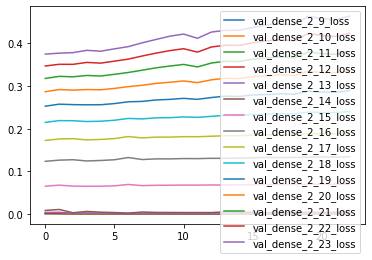

In [ ]:
cols = [col for col in metrics.columns if 'val' in col]
plt.show()
metrics[cols[10:25]].plot.line()

In [ ]:
[X_s[1:2,:,:].shape,s0[1:2,:].shape,c0[1:2,:].shape]

[(1, 24, 41), (1, 64), (1, 64)]

In [ ]:
single_test_pred = model.predict([X_s[3:4,:,:],s0[1:2,:],c0[1:2,:]])

In [ ]:
single_test_pred

[array([[9.9991727e-01, 8.2669852e-05]], dtype=float32),
 array([[9.9999797e-01, 2.0292127e-06]], dtype=float32),
 array([[9.9999917e-01, 7.9999529e-07]], dtype=float32),
 array([[9.999993e-01, 7.173021e-07]], dtype=float32),
 array([[9.9999917e-01, 8.0387503e-07]], dtype=float32),
 array([[9.9999905e-01, 9.8367696e-07]], dtype=float32),
 array([[9.9999869e-01, 1.2801903e-06]], dtype=float32),
 array([[9.9999821e-01, 1.7784355e-06]], dtype=float32),
 array([[9.9999738e-01, 2.6693688e-06]], dtype=float32),
 array([[9.9999559e-01, 4.3576692e-06]], dtype=float32),
 array([[9.999924e-01, 7.663197e-06]], dtype=float32),
 array([[9.9998569e-01, 1.4291485e-05]], dtype=float32),
 array([[9.9997115e-01, 2.8865044e-05]], dtype=float32),
 array([[9.999312e-01, 6.883294e-05]], dtype=float32),
 array([[9.9978298e-01, 2.1700765e-04]], dtype=float32),
 array([[9.992016e-01, 7.984001e-04]], dtype=float32),
 array([[0.9977781 , 0.00222187]], dtype=float32),
 array([[0.9958418 , 0.00415818]], dtype=floa

In [ ]:
c0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test.iloc[:,2:-2].values.reshape((1,24,41))

In [ ]:
model.predict([test.iloc[:,2:-2].values.reshape((1,24,41)),s0[1:2,:],c0[1:2,:]])

[array([[9.9989176e-01, 1.0827957e-04]], dtype=float32),
 array([[9.9999738e-01, 2.6743019e-06]], dtype=float32),
 array([[9.9999905e-01, 1.0062314e-06]], dtype=float32),
 array([[9.9999905e-01, 8.9814392e-07]], dtype=float32),
 array([[9.9999893e-01, 1.0216853e-06]], dtype=float32),
 array([[9.9999869e-01, 1.2799217e-06]], dtype=float32),
 array([[9.9999833e-01, 1.7153753e-06]], dtype=float32),
 array([[9.9999750e-01, 2.4751587e-06]], dtype=float32),
 array([[9.9999607e-01, 3.9191541e-06]], dtype=float32),
 array([[9.999931e-01, 6.902524e-06]], dtype=float32),
 array([[9.9998641e-01, 1.3532645e-05]], dtype=float32),
 array([[9.9997008e-01, 2.9909854e-05]], dtype=float32),
 array([[9.999211e-01, 7.895812e-05]], dtype=float32),
 array([[9.9972373e-01, 2.7620053e-04]], dtype=float32),
 array([[0.99868494, 0.00131504]], dtype=float32),
 array([[0.99447304, 0.00552694]], dtype=float32),
 array([[0.98583084, 0.01416913]], dtype=float32),
 array([[0.97572404, 0.02427595]], dtype=float32),
 a

In [ ]:
#i need to show this patients sepsis progress over the 24 hour period, at each time point i can show the proabs assigned to it
single_patient_profile = pd.DataFrame()
single_patient_profile['Time'] = list(range(24))
single_patient_profile['Sepsis_Onset'] = test['SepsisLabel'].values
single_patient_profile['Probas'] = model.predict([test.iloc[:,2:-2].values.reshape((1,24,41)),s0[1:2,:],c0[1:2,:]])
single_patient_profile

,Time,Sepsis_Onset,Probas
0,0,0,"[[0.99989176, 0.00010827957]]"
1,1,0,"[[0.9999974, 2.6743019e-06]]"
2,2,0,"[[0.99999905, 1.0062314e-06]]"
3,3,0,"[[0.99999905, 8.981439e-07]]"
4,4,0,"[[0.9999989, 1.0216853e-06]]"
5,5,0,"[[0.9999987, 1.2799217e-06]]"
6,6,0,"[[0.99999833, 1.7153753e-06]]"
7,7,0,"[[0.9999975, 2.4751587e-06]]"
8,8,0,"[[0.99999607, 3.919154e-06]]"
9,9,0,"[[0.9999931, 6.902524e-06]]"


In [ ]:
model.predict([test.iloc[:,2:-2].values.reshape((1,24,41)),s0[1:2,:],c0[1:2,:]])[0][0,1]

0.00015651007

In [ ]:
#turn proabs into a 2d array
test_probas = model.predict([test.iloc[:,2:-2].values.reshape((1,24,41)),s0[1:2,:],c0[1:2,:]])
test_probs_transposed = np.zeros((2,24))
for i in range(0,24):
  test_probs_transposed[:,i] = test_probas[i].ravel()

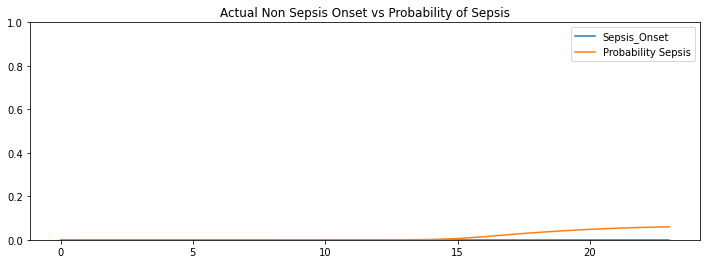

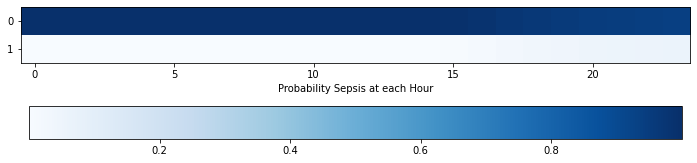

In [ ]:
#fig, axs = plt.subplots(2,figsize=(10,10))
#axs[0] = plt.plot(range(24),test['SepsisLabel'].values)
plt.figure(figsize=(12,4))
plt.plot(range(24),single_patient_profile['Sepsis_Onset'].values,label='Sepsis_Onset')
plt.plot(range(24), test_probs_transposed[1,:],label='Probability Sepsis')
plt.ylim([0,1])
plt.legend()
plt.title('Actual Non Sepsis Onset vs Probability of Sepsis')
plt.show()
'''
plt.figure(figsize=(12,4))
plt.imshow(test_probs_transposed,interpolation='nearest',cmap='Reds')
plt.colorbar(location="bottom")
plt.show()
'''
fig, ax = plt.subplots(figsize=(12,4))
im = ax.imshow(test_probs_transposed,interpolation='nearest',cmap='Blues')
ax.set_xlabel("Probability Sepsis at each Hour")

fig.colorbar(im, orientation="horizontal", pad=0.2)
plt.show()




In [ ]:
test_probs_transposed[0,:].tolist()

[0.9998434782028198,
 0.9999960660934448,
 0.9999986886978149,
 0.9999988079071045,
 0.9999985694885254,
 0.9999980926513672,
 0.9999971389770508,
 0.9999949932098389,
 0.9999889135360718,
 0.9999693632125854,
 0.999901294708252,
 0.9996294975280762,
 0.9981928467750549,
 0.9911465048789978,
 0.9705060720443726,
 0.9339262843132019,
 0.8834575414657593,
 0.8213114142417908,
 0.7495359778404236,
 0.6699605584144592,
 0.5848297476768494,
 0.4981118142604828,
 0.41566532850265503,
 0.3431522846221924]

In [ ]:
test['SepsisLabel']

5520    0
5521    0
5522    0
5523    0
5524    0
5525    0
5526    0
5527    0
5528    0
5529    0
5530    0
5531    0
5532    0
5533    0
5534    0
5535    0
5536    0
5537    0
5538    1
5539    1
5540    1
5541    1
5542    1
5543    1
Name: SepsisLabel, dtype: int64

In [ ]:
X_s[0:0,:,:].shape

(0, 24, 41)

In [ ]:
s0.shape,c0.shape

((113811, 64), (113811, 64))

In [ ]:
model.input[0].shape

TensorShape([None, 24, 41])

In [ ]:
model.input[1]

<tf.Tensor 's0_1:0' shape=(None, 64) dtype=float32>

In [ ]:
(1/.9) + (1/.9)

2.2222222222222223

In [ ]:
1/2.222


0.45004500450045004